In [155]:
#import dep.
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

In [156]:
#pull cleaned data
df = pd.read_csv('../Outputs/cleaned_data.csv')
df

,Unnamed: 0,Country Name,Year,Renewables Value,Renewables Share,Non-Renewables Value,Non-Renewables Share,CO2 Emissions,Particulate Matter,Respiratory Death Rate
0,0,Argentina,2015,33567.573000,0.247105,104023.260000,0.752895,191743840.0,13.940,34.86
1,1,Argentina,2016,31013.883000,0.213672,108158.284000,0.786328,189920430.0,13.690,35.81
2,2,Argentina,2017,33292.217000,0.249992,104623.013000,0.750008,186898880.0,13.008,35.94
3,3,Argentina,2018,34652.219560,0.324108,104535.897342,0.675892,180599330.0,12.384,35.09
4,4,Argentina,2019,34524.081521,0.275338,97938.231521,0.724662,178511620.0,11.832,34.85
...,...,...,...,...,...,...,...,...,...,...
336,336,Switzerland,2015,42255.900000,0.552085,23861.750000,0.447915,38731820.0,10.782,15.62
337,337,Switzerland,2016,39423.574000,0.669028,22269.681000,0.330972,39185340.0,9.956,15.32
338,338,Switzerland,2017,40241.822000,0.642973,21408.501000,0.357027,38178644.0,9.854,15.15
339,339,Switzerland,2018,41232.025374,0.530301,26218.760654,0.469699,36873816.0,9.974,15.03


In [157]:
#drop duplicates
df2 =df.drop_duplicates(subset=["Country Name", "Year"])
df2

,Unnamed: 0,Country Name,Year,Renewables Value,Renewables Share,Non-Renewables Value,Non-Renewables Share,CO2 Emissions,Particulate Matter,Respiratory Death Rate
0,0,Argentina,2015,33567.573000,0.247105,104023.260000,0.752895,191743840.0,13.940,34.86
1,1,Argentina,2016,31013.883000,0.213672,108158.284000,0.786328,189920430.0,13.690,35.81
2,2,Argentina,2017,33292.217000,0.249992,104623.013000,0.750008,186898880.0,13.008,35.94
3,3,Argentina,2018,34652.219560,0.324108,104535.897342,0.675892,180599330.0,12.384,35.09
4,4,Argentina,2019,34524.081521,0.275338,97938.231521,0.724662,178511620.0,11.832,34.85
...,...,...,...,...,...,...,...,...,...,...
336,336,Switzerland,2015,42255.900000,0.552085,23861.750000,0.447915,38731820.0,10.782,15.62
337,337,Switzerland,2016,39423.574000,0.669028,22269.681000,0.330972,39185340.0,9.956,15.32
338,338,Switzerland,2017,40241.822000,0.642973,21408.501000,0.357027,38178644.0,9.854,15.15
339,339,Switzerland,2018,41232.025374,0.530301,26218.760654,0.469699,36873816.0,9.974,15.03


In [158]:
#pull population from resources
population_df = pd.read_csv('../Resources/population_country.csv',  on_bad_lines='skip')
population_df

,Country Name,Country Code,Indicator Name,Indicator Code,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0
...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0


In [159]:
#clean up
completeDF = pd.melt(population_df, id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], var_name="Year",
                    value_name="Population")
completeDF

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,2015,104257.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,2015,600008150.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,2015,33753499.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,2015,408690375.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,2015,28127721.0
...,...,...,...,...,...,...
1857,Kosovo,XKX,"Population, total",SP.POP.TOTL,2021,1786038.0
1858,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,2021,32981641.0
1859,South Africa,ZAF,"Population, total",SP.POP.TOTL,2021,59392255.0
1860,Zambia,ZMB,"Population, total",SP.POP.TOTL,2021,19473125.0


In [160]:
completeDF["Year"] = completeDF["Year"].astype(str)

In [161]:
df2["Year"] = df2["Year"].astype(str)

In [162]:
#merge the dataframes into one
merged_df = pd.merge(df2, completeDF, on=["Country Name", "Year"])
merged_df

,Unnamed: 0,Country Name,Year,Renewables Value,Renewables Share,Non-Renewables Value,Non-Renewables Share,CO2 Emissions,Particulate Matter,Respiratory Death Rate,Country Code,Indicator Name,Indicator Code,Population
0,0,Argentina,2015,33567.573000,0.247105,104023.260000,0.752895,191743840.0,13.940,34.86,ARG,"Population, total",SP.POP.TOTL,43131966.0
1,1,Argentina,2016,31013.883000,0.213672,108158.284000,0.786328,189920430.0,13.690,35.81,ARG,"Population, total",SP.POP.TOTL,43590368.0
2,2,Argentina,2017,33292.217000,0.249992,104623.013000,0.750008,186898880.0,13.008,35.94,ARG,"Population, total",SP.POP.TOTL,44044811.0
3,3,Argentina,2018,34652.219560,0.324108,104535.897342,0.675892,180599330.0,12.384,35.09,ARG,"Population, total",SP.POP.TOTL,44494502.0
4,4,Argentina,2019,34524.081521,0.275338,97938.231521,0.724662,178511620.0,11.832,34.85,ARG,"Population, total",SP.POP.TOTL,44938712.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,336,Switzerland,2015,42255.900000,0.552085,23861.750000,0.447915,38731820.0,10.782,15.62,CHE,"Population, total",SP.POP.TOTL,8282396.0
191,337,Switzerland,2016,39423.574000,0.669028,22269.681000,0.330972,39185340.0,9.956,15.32,CHE,"Population, total",SP.POP.TOTL,8373338.0
192,338,Switzerland,2017,40241.822000,0.642973,21408.501000,0.357027,38178644.0,9.854,15.15,CHE,"Population, total",SP.POP.TOTL,8451840.0
193,339,Switzerland,2018,41232.025374,0.530301,26218.760654,0.469699,36873816.0,9.974,15.03,CHE,"Population, total",SP.POP.TOTL,8514329.0


In [163]:
#drop unnecessary columns
cleaned_df = merged_df.drop(["Indicator Name", "Indicator Code", "CO2 Emissions", "Particulate Matter",
                             "Respiratory Death Rate", "Country Code", "Renewables Value",
                                 "Non-Renewables Value"], axis=1)
cleaned_df

,Unnamed: 0,Country Name,Year,Renewables Share,Non-Renewables Share,Population
0,0,Argentina,2015,0.247105,0.752895,43131966.0
1,1,Argentina,2016,0.213672,0.786328,43590368.0
2,2,Argentina,2017,0.249992,0.750008,44044811.0
3,3,Argentina,2018,0.324108,0.675892,44494502.0
4,4,Argentina,2019,0.275338,0.724662,44938712.0
...,...,...,...,...,...,...
190,336,Switzerland,2015,0.552085,0.447915,8282396.0
191,337,Switzerland,2016,0.669028,0.330972,8373338.0
192,338,Switzerland,2017,0.642973,0.357027,8451840.0
193,339,Switzerland,2018,0.530301,0.469699,8514329.0


In [164]:
FullDF = cleaned_df.groupby(["Country Name", "Year"])[["Renewables Share", "Non-Renewables Share", "Population"]].agg("sum")
FullDF

Renewables Share  Non-Renewables Share  Population
Country Name Year                                                    
Argentina    2015          0.247105              0.752895  43131966.0
             2016          0.213672              0.786328  43590368.0
             2017          0.249992              0.750008  44044811.0
             2018          0.324108              0.675892  44494502.0
             2019          0.275338              0.724662  44938712.0
...                             ...                   ...         ...
Switzerland  2015          0.552085              0.447915   8282396.0
             2016          0.669028              0.330972   8373338.0
             2017          0.642973              0.357027   8451840.0
             2018          0.530301              0.469699   8514329.0
             2019          0.572796              0.427204   8575280.0

[195 rows x 3 columns]

In [165]:
AdjustedDF = FullDF

In [166]:
#create differnt dataframe to adjust population size metric to fit on a plot
AdjustedDF["Population"] = FullDF["Population"] * .08
AdjustedDF

Renewables Share  Non-Renewables Share  Population
Country Name Year                                                    
Argentina    2015          0.247105              0.752895  3450557.28
             2016          0.213672              0.786328  3487229.44
             2017          0.249992              0.750008  3523584.88
             2018          0.324108              0.675892  3559560.16
             2019          0.275338              0.724662  3595096.96
...                             ...                   ...         ...
Switzerland  2015          0.552085              0.447915   662591.68
             2016          0.669028              0.330972   669867.04
             2017          0.642973              0.357027   676147.20
             2018          0.530301              0.469699   681146.32
             2019          0.572796              0.427204   686022.40

[195 rows x 3 columns]

In [167]:
#find means to get rid of years
Something=AdjustedDF.groupby(by = "Country Name").mean()

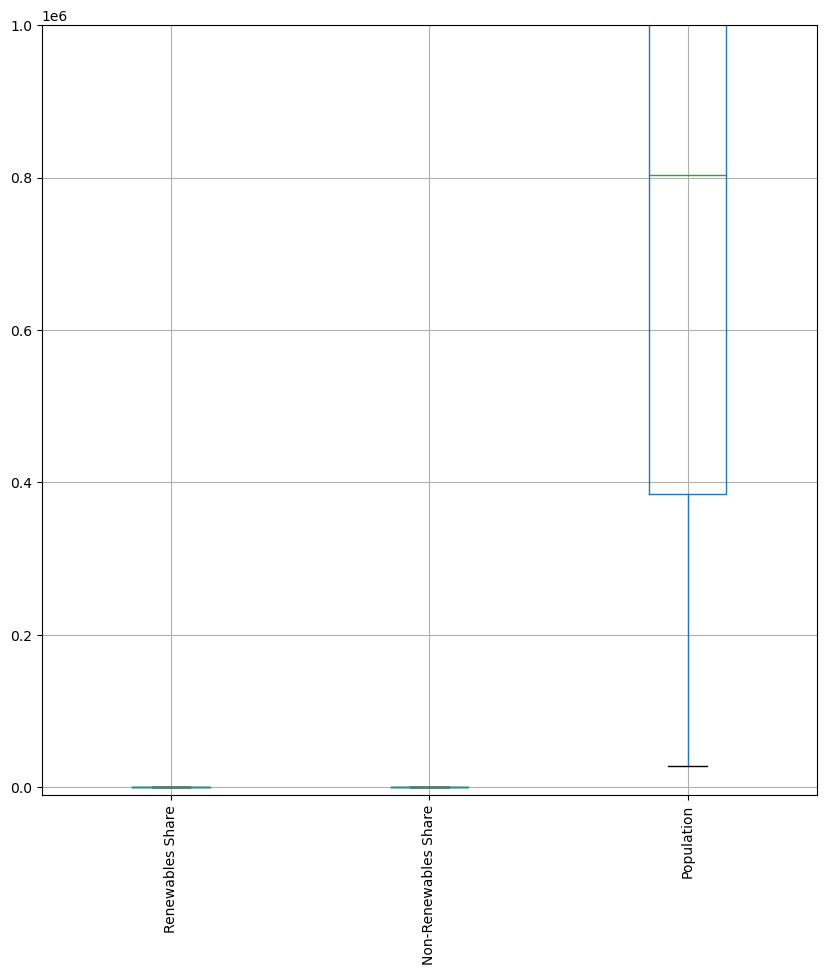

In [168]:
#create box plot for adjusted 
Something.boxplot(figsize = (10,10), rot = 90, fontsize = "10", grid = True)
plt.ylim(-10000, 1000000)
plt.show()

In [169]:
#new dataframe for cleaner box plot, sort by population
df9 = Something
df9 = df9.sort_values(by = "Population")
df9 = df9.drop("Renewables Share", axis=1)
df9 = df9.drop("Population", axis=1)

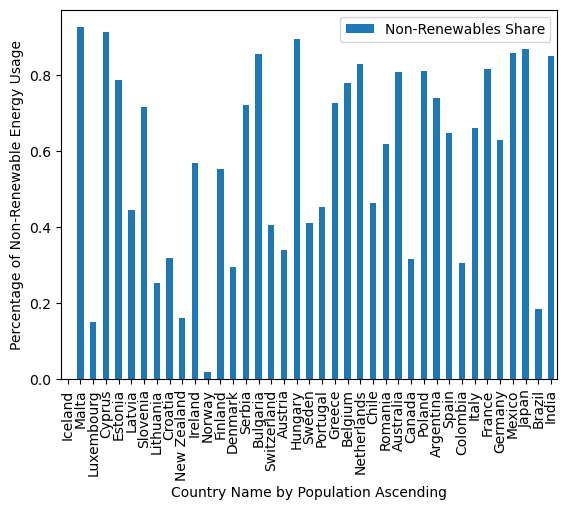

In [170]:
#show clean box plot
df9.plot(kind= "bar")
plt.xlabel("Country Name by Population Ascending")
plt.ylabel("Percentage of Non-Renewable Energy Usage")
plt.show()

The r-value is 0.07994508576506415
The P-value is 0.6332788163679373


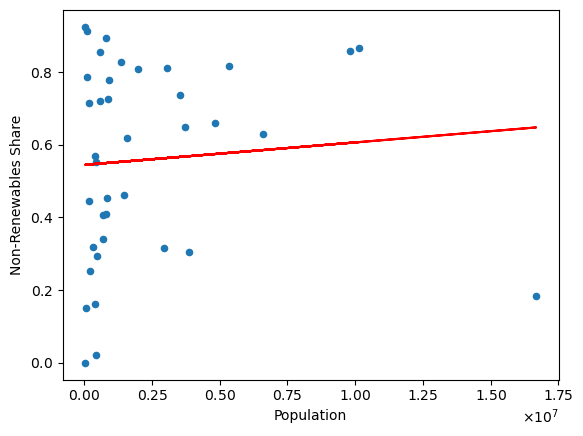

In [171]:
#new dataframe for scatterplot, take out renewables share to put population vs non-renewables
df10 = Something
df10 = df10.drop("Renewables Share", axis=1)
df10 = df10.reset_index()
df10 = df10.drop(df10.loc[df10["Country Name"]== "India"].index)
df10.plot.scatter(x= "Population", y = "Non-Renewables Share")
(slope, intercept, rvalue, pvalue, stdev) = linregress(df10["Population"], df10["Non-Renewables Share"])
regressValues = df10["Population"] * slope + intercept
plt.plot(df10["Population"], regressValues, 'r-')
plt.ticklabel_format(useOffset=False,useMathText=True)
#print r-value and p-value
print(f'The r-value is {rvalue}')
print(f'The P-value is {pvalue}')
plt.show()

In [173]:

stats.ttest_ind(x_value, y_value, equal_var=False)

C:\Users\Benm1\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


TypeError: cannot perform reduce with flexible type